<a href="https://colab.research.google.com/github/BM-MINNIE/FinalBookingFlightProject/blob/main/Project1_DES432.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cleaning data
import pandas as pd
import numpy as np

# 1) Load raw data
df = pd.read_csv("athlete_events.csv")

# 2) Strip whitespace from text columns
text_cols = ["Name", "Sex", "Team", "NOC", "Games", "Season",
             "City", "Sport", "Event", "Medal"]
for c in text_cols:
    if c in df.columns:
        df[c] = df[c].astype("string").str.strip()

# 3) Remove exact duplicates
df = df.drop_duplicates()

# 4) Fix Medal variable
df["Medal"] = df["Medal"].replace("", np.nan)
df["Medal"] = df["Medal"].fillna("No Medal")

# 5) Convert numeric columns
for col in ["Age", "Height", "Weight"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 6) Remove impossible values
df.loc[(df["Age"] < 10) | (df["Age"] > 80), "Age"] = np.nan
df.loc[(df["Height"] < 120) | (df["Height"] > 250), "Height"] = np.nan
df.loc[(df["Weight"] < 30) | (df["Weight"] > 250), "Weight"] = np.nan

# 7) Impute missing values using median by Sport + Sex
group_cols = ["Sport", "Sex"]
for col in ["Age", "Height", "Weight"]:
    df[col] = df[col].fillna(
        df.groupby(group_cols)[col].transform("median")
    )

# 8) Fallback to overall median
for col in ["Age", "Height", "Weight"]:
    df[col] = df[col].fillna(df[col].median())

# 9) Final check: ensure no missing numeric values
assert df[["Age", "Height", "Weight"]].isna().sum().sum() == 0

# 10) Save
df.to_csv("athlete_events_cleaned.csv", index=False)

print("Cleaning complete. Final shape:", df.shape)


Cleaning complete. Final shape: (269731, 15)


In [ ]:
#Setup with Track filter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("athlete_events_cleaned.csv")

# Keep Summer Olympics only
df = df[df["Season"] == "Summer"]

# ---------------------------
# Define Track events only
# ---------------------------
track_keywords = [
    "metres", "Meters", "metre", "Meter",
    "Relay", "Hurdles", "Steeplechase"
]

track_df = df[
    (df["Sport"] == "Athletics") &
    (df["Event"].str.contains('|'.join(track_keywords), case=False, na=False))
]

# Swimming dataset
swim_df = df[df["Sport"] == "Swimming"]

# Combine Track + Swimming
df_compare = pd.concat([
    track_df.assign(Discipline="Athletics (Track Events)"),
    swim_df.assign(Discipline="Swimming")
])

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)



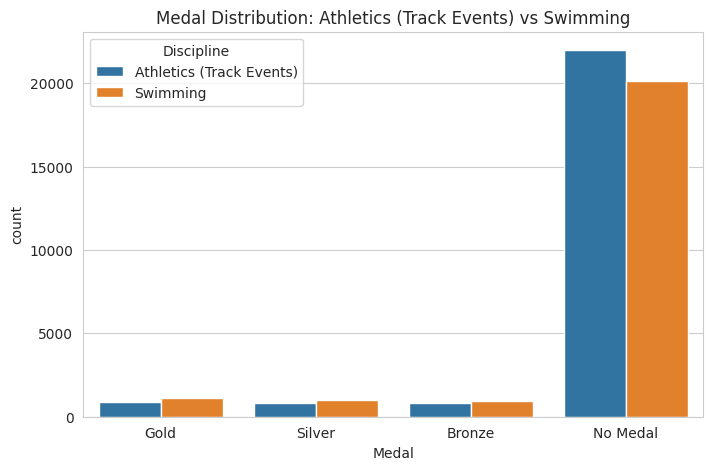

In [ ]:
#6.1.1 Medal distribution
plt.figure()
sns.countplot(data=df_compare, x="Medal", hue="Discipline",
              order=["Gold", "Silver", "Bronze", "No Medal"])
plt.title("Medal Distribution: Athletics (Track Events) vs Swimming")
plt.show()


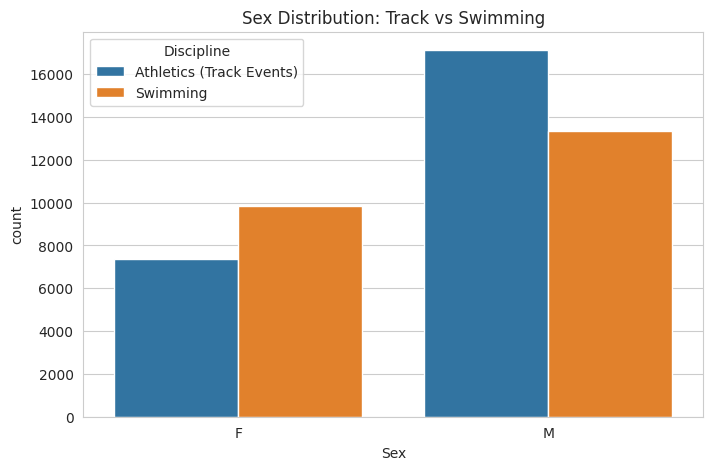

In [ ]:
#6.1.2 Sex Distribution
plt.figure()
sns.countplot(data=df_compare, x="Sex", hue="Discipline")
plt.title("Sex Distribution: Track vs Swimming")
plt.show()



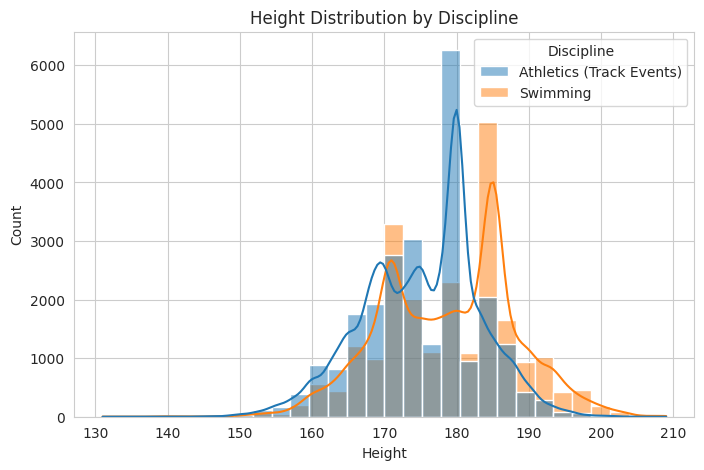

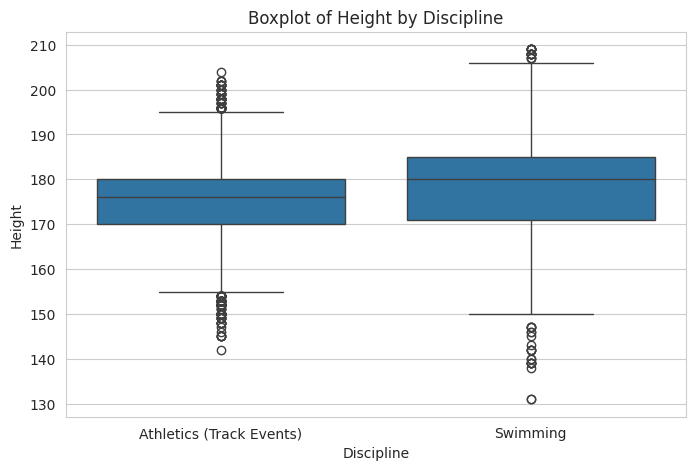

In [ ]:
#6.2.1 Height Distribution (Histogram)
plt.figure()
sns.histplot(data=df_compare, x="Height", hue="Discipline", kde=True, bins=30)
plt.title("Height Distribution by Discipline")
plt.show()

print("")
#Boxplot version
plt.figure()
sns.boxplot(data=df_compare, x="Discipline", y="Height")
plt.title("Boxplot of Height by Discipline")
plt.show()



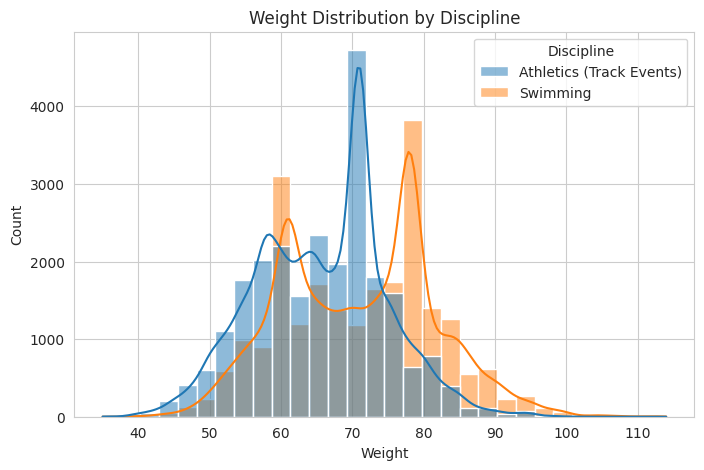

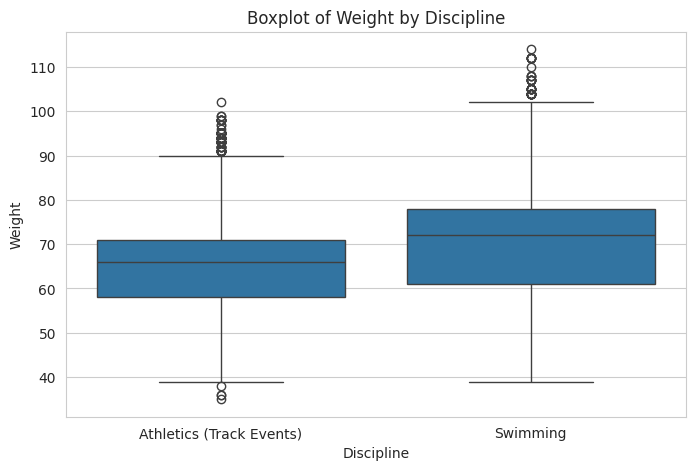

In [ ]:
#6.2.2 Weight
plt.figure()
sns.histplot(data=df_compare, x="Weight", hue="Discipline", kde=True, bins=30)
plt.title("Weight Distribution by Discipline")
plt.show()

print("")
plt.figure()
sns.boxplot(data=df_compare, x="Discipline", y="Weight")
plt.title("Boxplot of Weight by Discipline")
plt.show()


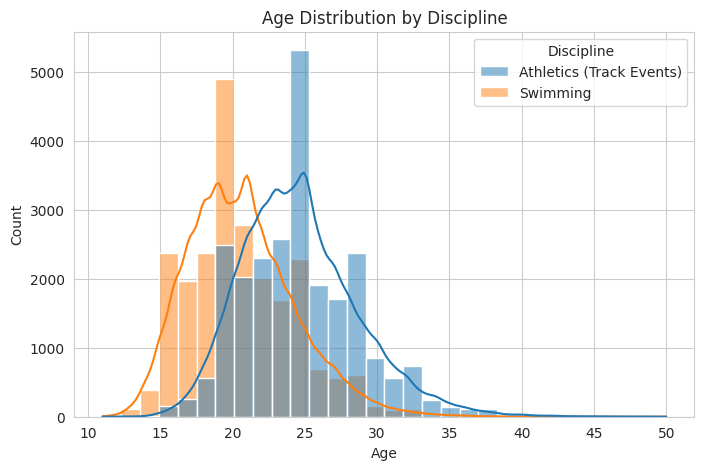

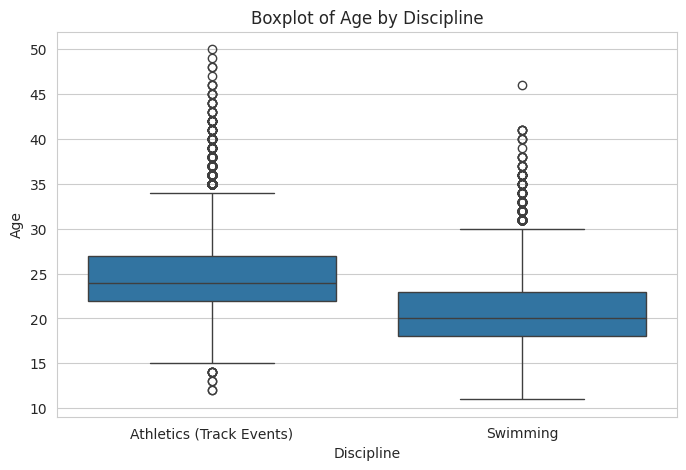

In [ ]:
#6.2.3 Age
plt.figure()
sns.histplot(data=df_compare, x="Age", hue="Discipline", kde=True, bins=30)
plt.title("Age Distribution by Discipline")
plt.show()

print("")
plt.figure()
sns.boxplot(data=df_compare, x="Discipline", y="Age")
plt.title("Boxplot of Age by Discipline")
plt.show()


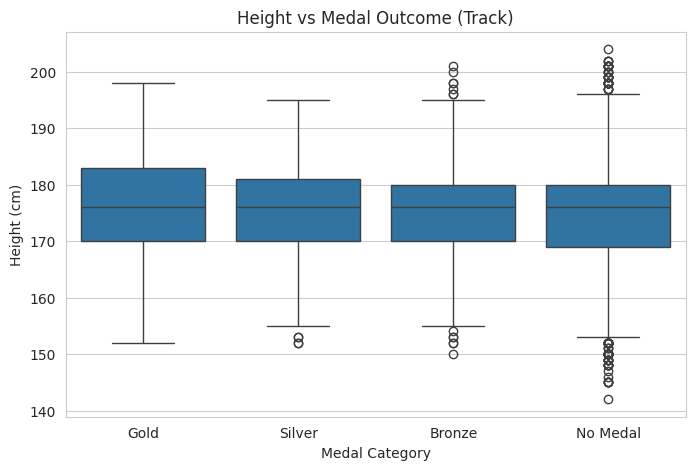

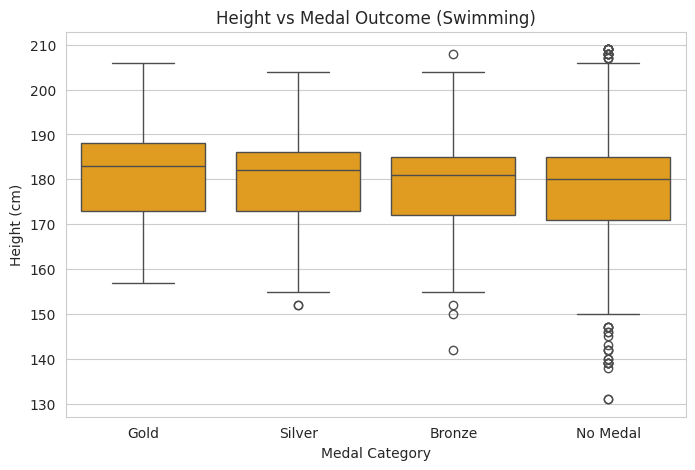

In [ ]:
#6.3.1 Height vs Medal
# Track only
plt.figure()
sns.boxplot(
    data=df_compare[df_compare["Discipline"] == "Athletics (Track Events)"],
    x="Medal",
    y="Height",
    order=["Gold", "Silver", "Bronze", "No Medal"],

)

plt.title("Height vs Medal Outcome (Track)")
plt.xlabel("Medal Category")
plt.ylabel("Height (cm)")
plt.show()

print("")
#Swimming only
plt.figure()
sns.boxplot(
    data=df_compare[df_compare["Discipline"] == "Swimming"],
    x="Medal",
    y="Height",
    order=["Gold", "Silver", "Bronze", "No Medal"],
    color="orange"
)

plt.title("Height vs Medal Outcome (Swimming)")
plt.xlabel("Medal Category")
plt.ylabel("Height (cm)")
plt.show()

print("")


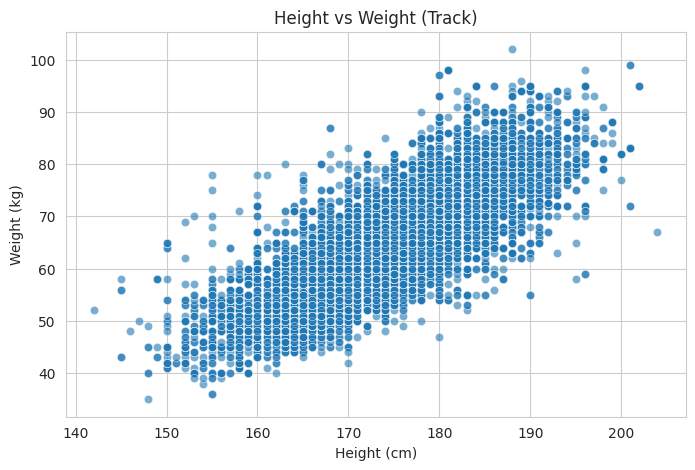

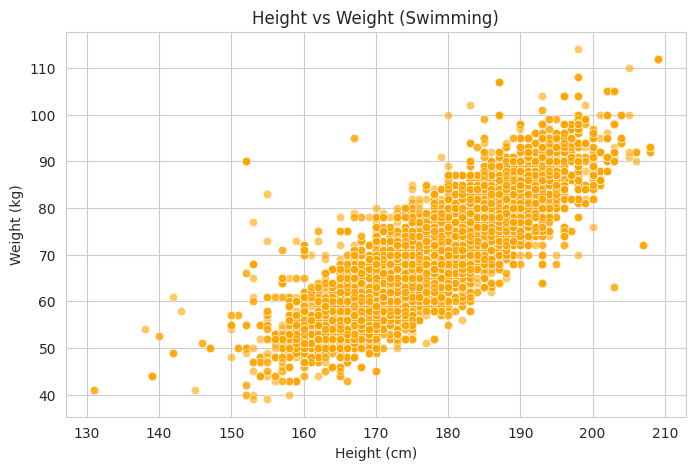

In [ ]:
#6.3.2 Height vs Weight
#Track only
plt.figure()
sns.scatterplot(
    data=df_compare[df_compare["Discipline"] == "Athletics (Track Events)"],
    x="Height",
    y="Weight",
    alpha=0.6
)

plt.title("Height vs Weight (Track)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

print("")
# Swimming only
plt.figure()
sns.scatterplot(
    data=df_compare[df_compare["Discipline"] == "Swimming"],
    x="Height",
    y="Weight",
    alpha=0.6,
    color="orange"
)

plt.title("Height vs Weight (Swimming)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()



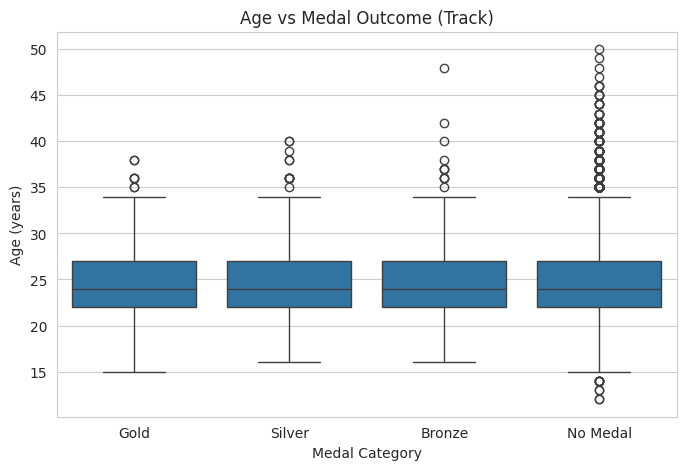

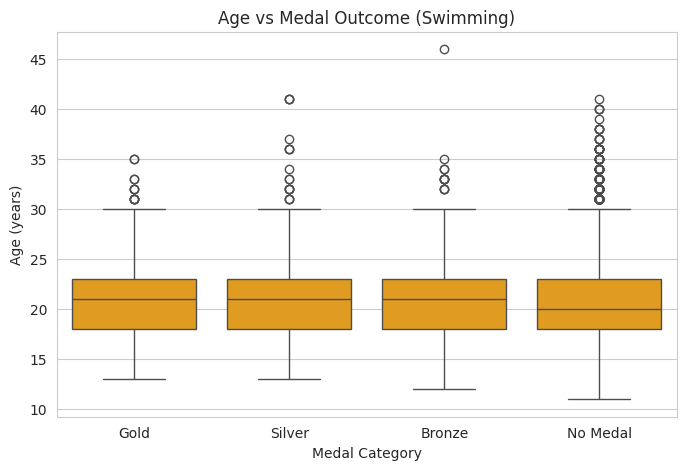

In [ ]:
#6.3.3 Age vs Medal
# Track only
plt.figure()
sns.boxplot(
    data=df_compare[df_compare["Discipline"] == "Athletics (Track Events)"],
    x="Medal",
    y="Age",
    order=["Gold", "Silver", "Bronze", "No Medal"]
)

plt.title("Age vs Medal Outcome (Track)")
plt.xlabel("Medal Category")
plt.ylabel("Age (years)")
plt.show()
print(" ")
# Swimming only
plt.figure()
sns.boxplot(
    data=df_compare[df_compare["Discipline"] == "Swimming"],
    x="Medal",
    y="Age",
    order=["Gold", "Silver", "Bronze", "No Medal"],
    color="orange"
)

plt.title("Age vs Medal Outcome (Swimming)")
plt.xlabel("Medal Category")
plt.ylabel("Age (years)")
plt.show()



In [ ]:
# 7. Descriptive Statistics
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv("athlete_events_cleaned.csv")

# Keep Summer only
df = df[df["Season"] == "Summer"]

# ----------------------------
# Define Track events
# ----------------------------
track_keywords = [
    "metres", "Meters", "metre", "Meter",
    "Relay", "Hurdles", "Steeplechase"
]

track_df = df[
    (df["Sport"] == "Athletics") &
    (df["Event"].str.contains('|'.join(track_keywords), case=False, na=False))
].copy()
track_df["Discipline"] = "Athletics (Track Events)"

swim_df = df[df["Sport"] == "Swimming"].copy()
swim_df["Discipline"] = "Swimming"

df_compare = pd.concat([track_df, swim_df])


# =====================================================
# 7. Descriptive Statistics
# =====================================================
print("\n" + "="*60)
print("7. Descriptive Statistics")
print("="*60)


# =====================================================
# 7.1 Categorical Variables
# =====================================================
print("\n7.1 Categorical Variables")
print("-"*60)

# Sex Distribution
print("\nSex Distribution:")
for name, group in df_compare.groupby("Discipline"):
    print(f"\n{name}")
    sex_percent = (group["Sex"].value_counts(normalize=True) * 100).round(2)
    for sex, value in sex_percent.items():
        print(f"{sex}: {value}%")
print("-"*60)
# Medal Distribution
print("\nMedal Distribution:")
for name, group in df_compare.groupby("Discipline"):
    print(f"\n{name}")
    medal_percent = (
        group["Medal"]
        .fillna("No Medal")
        .value_counts(normalize=True) * 100
    ).round(2)
    for medal, value in medal_percent.items():
        print(f"{medal}: {value}%")

# =====================================================
# Function for Continuous Variables + Outlier
# =====================================================
def continuous_summary(data, variable, unit):
    for name, group in data.groupby("Discipline"):
        series = group[variable].dropna()

        mean = round(series.mean(), 2)
        median = round(series.median(), 2)
        std = round(series.std(), 2)
        q1 = round(series.quantile(0.25), 2)
        q3 = round(series.quantile(0.75), 2)
        iqr = round(q3 - q1, 2)

        lower_fence = round(q1 - 1.5 * iqr, 2)
        upper_fence = round(q3 + 1.5 * iqr, 2)

        print(f"\n{name}")
        print(f"Mean = {mean} {unit}, Median = {median} {unit}")
        print(f"Standard Deviation = {std} {unit}, Q1 = {q1} {unit}, Q3 = {q3} {unit}, IQR = {iqr} {unit}")

        print("Outlier Detection (1.5 × IQR Rule):")
        print(f"Lower fence = {lower_fence}")
        print(f"Upper fence = {upper_fence}")
        print(f"Any value below {lower_fence} {unit} or above {upper_fence} {unit} is flagged as an outlier.")
        print("-"*60)

# =====================================================
# 7.2 Continuous Variable: Height
# =====================================================
print("\n" + "="*60)
print("7.2 Continuous Variable: Height")
print("="*60)
continuous_summary(df_compare, "Height", "cm")


# =====================================================
# 7.3 Continuous Variable: Weight
# =====================================================
print("\n" + "="*60)
print("7.3 Continuous Variable: Weight")
print("="*60)
continuous_summary(df_compare, "Weight", "kg")


# =====================================================
# 7.4 Continuous Variable: Age
# =====================================================
print("\n" + "="*60)
print("7.4 Continuous Variable: Age")
print("="*60)
continuous_summary(df_compare, "Age", "years")


7. Descriptive Statistics

7.1 Categorical Variables
------------------------------------------------------------

Sex Distribution:

Athletics (Track Events)
M: 69.86%
F: 30.14%

Swimming
M: 57.53%
F: 42.47%
------------------------------------------------------------

Medal Distribution:

Athletics (Track Events)
No Medal: 89.72%
Gold: 3.48%
Silver: 3.46%
Bronze: 3.35%

Swimming
No Medal: 86.86%
Gold: 4.74%
Silver: 4.28%
Bronze: 4.12%

7.2 Continuous Variable: Height

Athletics (Track Events)
Mean = 175.22 cm, Median = 176.0 cm
Standard Deviation = 8.09 cm, Q1 = 170.0 cm, Q3 = 180.0 cm, IQR = 10.0 cm
Outlier Detection (1.5 × IQR Rule):
Lower fence = 155.0
Upper fence = 195.0
Any value below 155.0 cm or above 195.0 cm is flagged as an outlier.
------------------------------------------------------------

Swimming
Mean = 178.91 cm, Median = 180.0 cm
Standard Deviation = 9.43 cm, Q1 = 171.0 cm, Q3 = 185.0 cm, IQR = 14.0 cm
Outlier Detection (1.5 × IQR Rule):
Lower fence = 150.0
Upper f